In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import plt
%pylab inline

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

prop_df  = pd.read_csv("properties_2017.csv",low_memory = False)
train_df = pd.read_csv("train_2017.csv", parse_dates=["transactiondate"])
#sample_submission = pd.read_csv("sample_submission.csv",low_memory = False)
print(prop_df)



Populating the interactive namespace from numpy and matplotlib
         parcelid  airconditioningtypeid  architecturalstyletypeid  \
0        10754147                    NaN                       NaN   
1        10759547                    NaN                       NaN   
2        10843547                    NaN                       NaN   
3        10859147                    NaN                       NaN   
4        10879947                    NaN                       NaN   
5        10898347                    NaN                       NaN   
6        10933547                    NaN                       NaN   
7        10940747                    NaN                       NaN   
8        10954547                    NaN                       NaN   
9        10976347                    NaN                       NaN   
10       11070347                    1.0                       NaN   
11       11073947                    NaN                       NaN   
12       11114347          

In [2]:
print(train_df)

       parcelid  logerror transactiondate
0      14297519  0.025595      2017-01-01
1      17052889  0.055619      2017-01-01
2      14186244  0.005383      2017-01-01
3      12177905 -0.103410      2017-01-01
4      10887214  0.006940      2017-01-01
5      17143294 -0.020526      2017-01-01
6      12095076 -0.001011      2017-01-01
7      12069064  0.101723      2017-01-01
8      12790562 -0.040966      2017-01-02
9      11542646 -0.036763      2017-01-02
10     11104527  0.005963      2017-01-02
11     13984101 -0.147997      2017-01-02
12     14705431 -0.028835      2017-01-02
13     13944538  0.045602      2017-01-02
14     14731691 -0.008935      2017-01-02
15     17110996  0.008669      2017-01-02
16     14375300 -0.021896      2017-01-02
17     12045625 -0.017167      2017-01-02
18     11830315 -0.035085      2017-01-02
19     14730402 -0.012041      2017-01-02
20     12325145  0.042463      2017-01-02
21     14387959 -0.006653      2017-01-02
22     14349322  0.044309      201

#### logerror is the difference lo(Zestimate) and log(Salesprice)

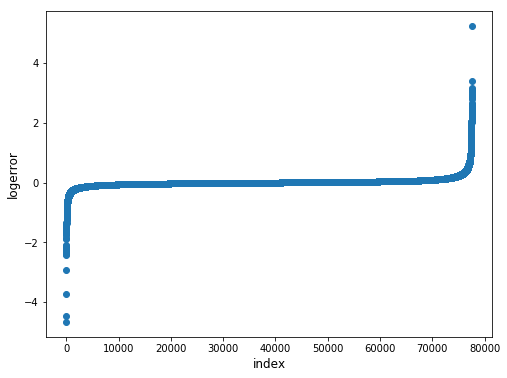

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

#### Range of logerrors

C:\Users\Mrunalini\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


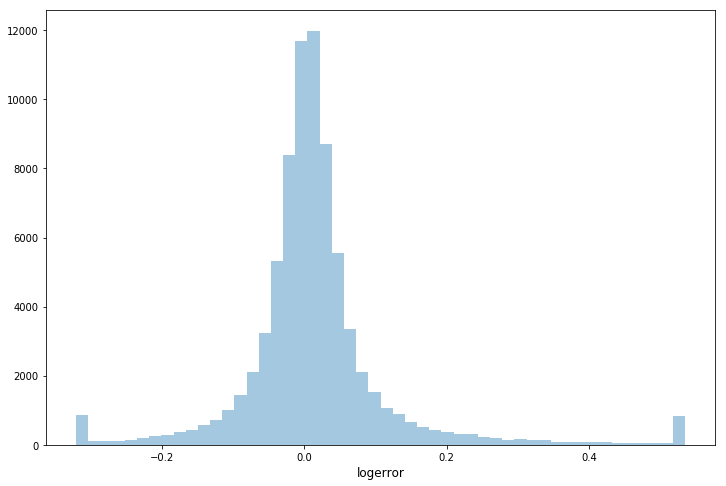

In [4]:
ulimit = np.percentile(train_df.logerror.values, 99)
llimit = np.percentile(train_df.logerror.values, 1)
train_df['logerror'].loc[train_df['logerror']>ulimit] = ulimit
train_df['logerror'].loc[train_df['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()
pd.options.mode.chained_assignment= None

#### Transaction Date:

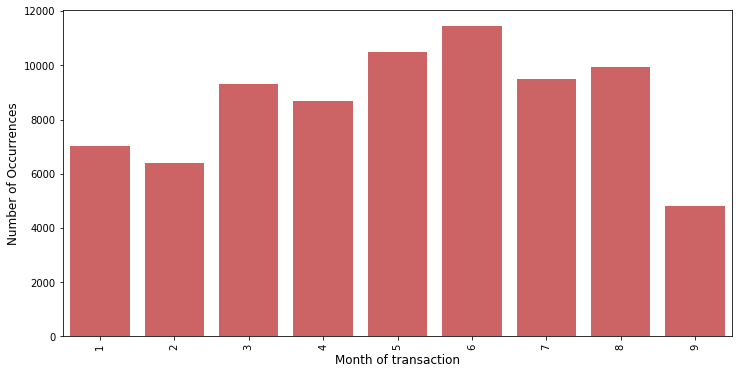

In [5]:
color = sns.color_palette()
train_df['transaction_month'] = train_df['transactiondate'].dt.month

cnt_srs = train_df['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

As we could see from the data page as well The train data has all the transactions before September 25, 2017 and no data of the transactions after September 25, 2017.

#### NaN values in properties2017 data

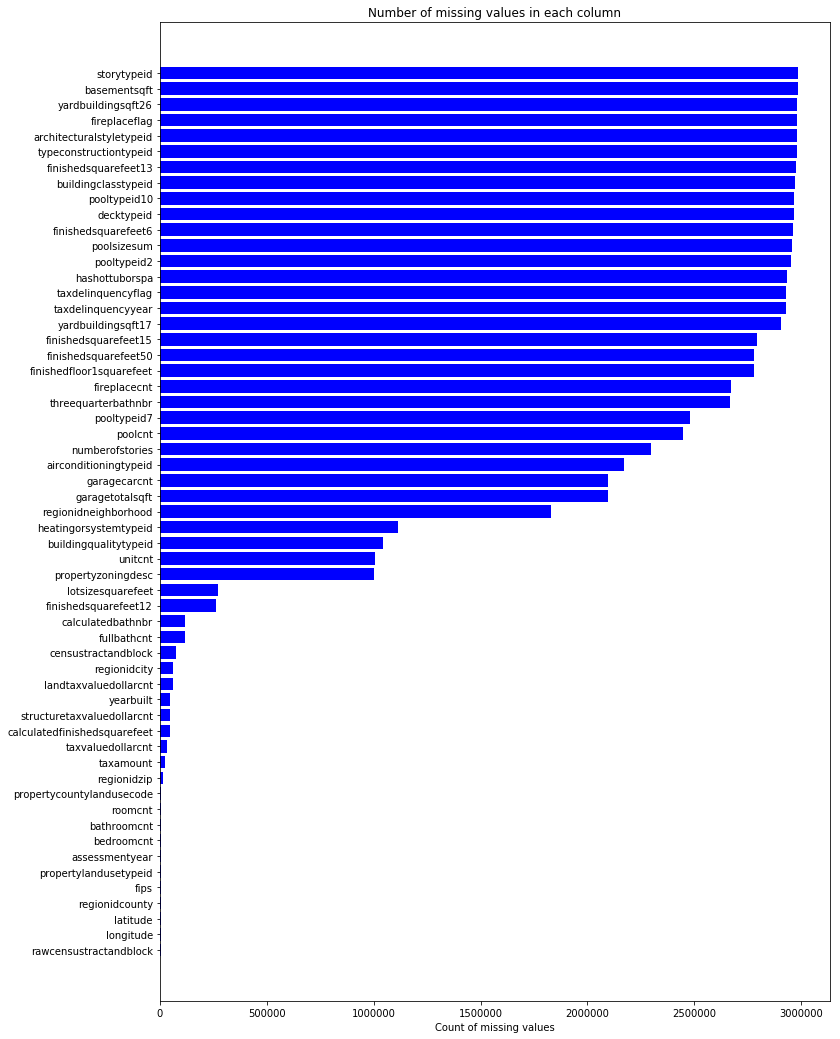

In [6]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

#### Sale area for Zillow market in 2017

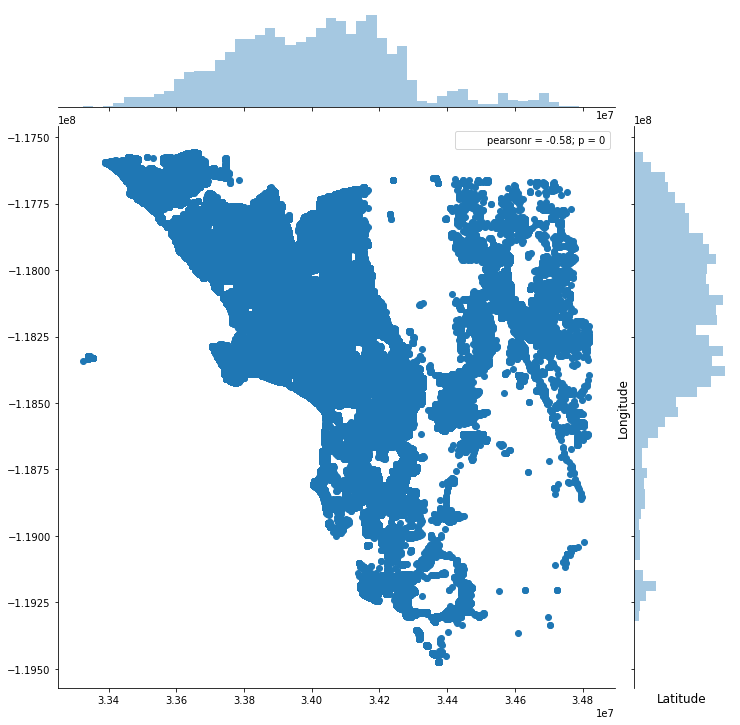

In [7]:
plt.figure(figsize=(12,12))
sns.jointplot(x=prop_df.latitude.values, y=prop_df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

#### Merging transactions and properties

In [8]:
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,17052889,0.055619,2017-01-01,1,NaN,NaN,NaN,1.0,2.0,NaN,...,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,14186244,0.005383,2017-01-01,1,NaN,NaN,NaN,2.0,3.0,NaN,...,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,12177905,-0.103410,2017-01-01,1,NaN,NaN,NaN,3.0,4.0,NaN,...,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,10887214,0.006940,2017-01-01,1,1.0,NaN,NaN,3.0,3.0,NaN,...,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13


In [9]:
pd.options.display.max_rows = 65

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


In [10]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


Checked the number of Nulls in this new merged dataset.

In [11]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.999]

,column_name,missing_count,missing_ratio
6,basementsqft,77563,0.999356
9,buildingclasstypeid,77598,0.999807
16,finishedsquarefeet13,77571,0.999459
44,storytypeid,77563,0.999356
49,yardbuildingsqft26,77543,0.999098


Five columns have missing values 99.9% of the times

#### Univariate Analysis:

C:\Users\Mrunalini\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Mrunalini\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


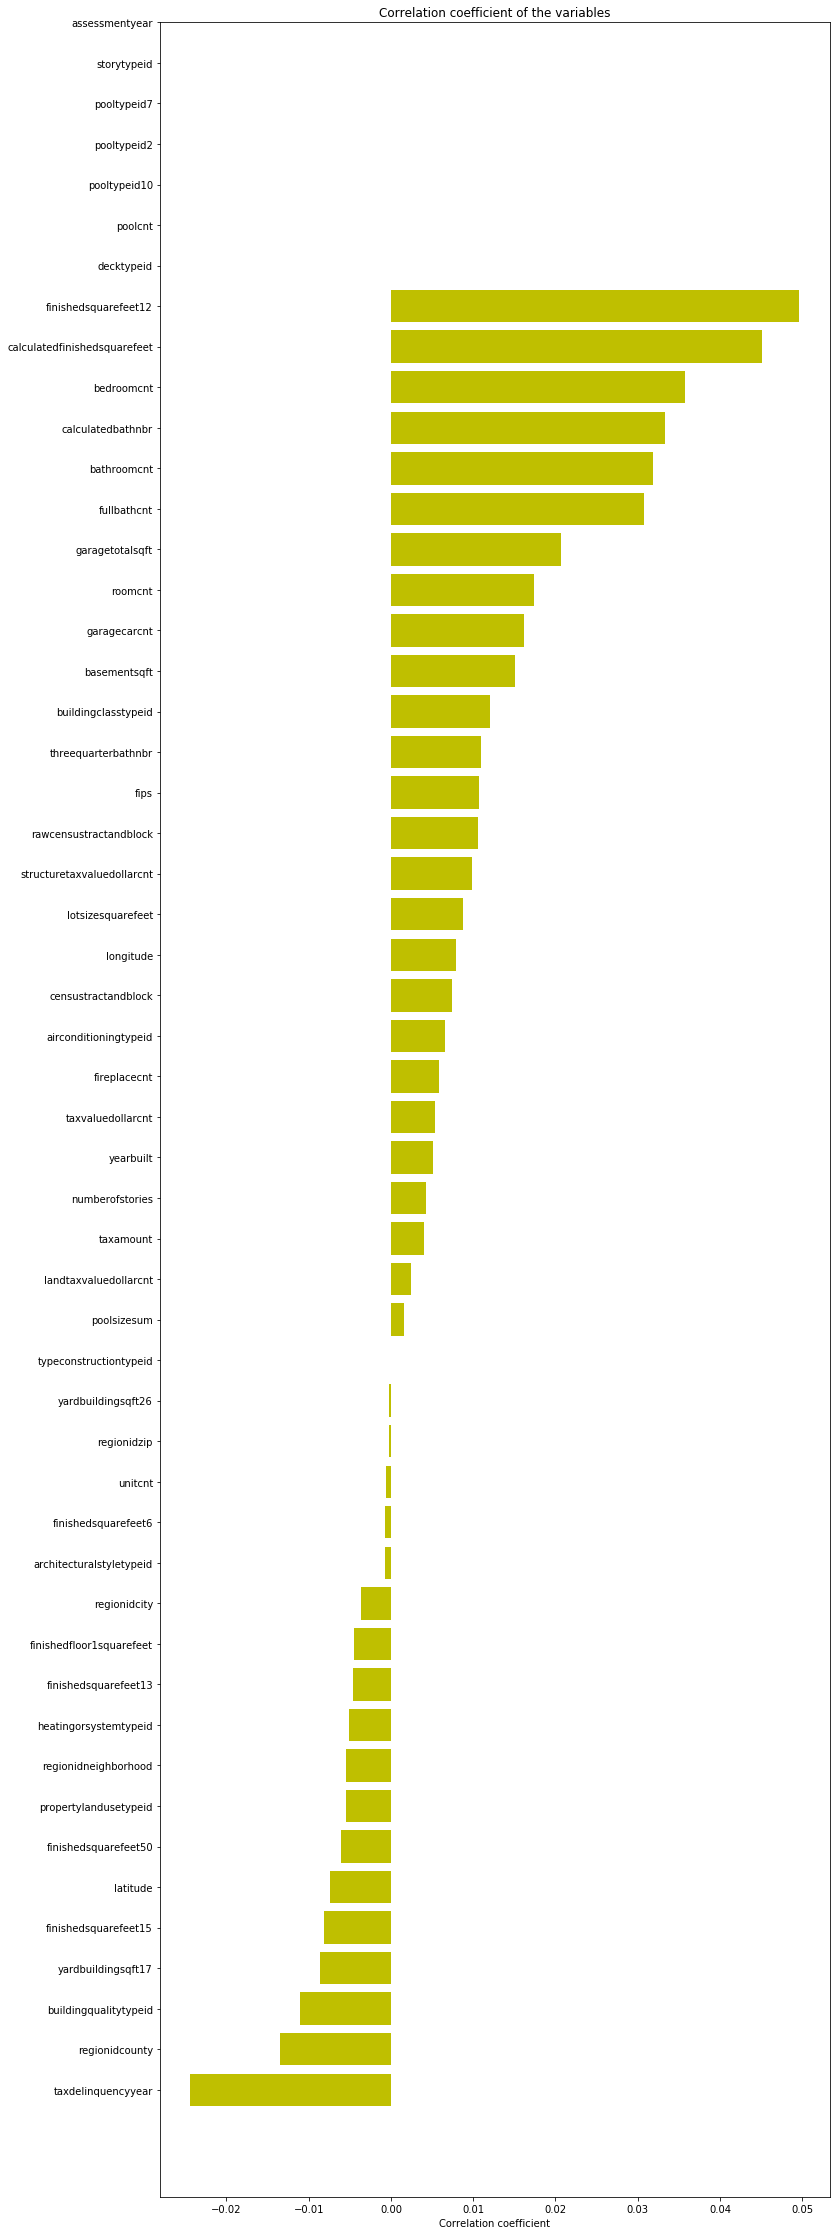

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [12]:
# Let us just impute the missing values with mean values to compute correlation coefficients #
mean_values = train_df.mean(axis=0)
train_df_new = train_df.fillna(mean_values, inplace=True)

# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()
np.seterr(divide='ignore', invalid='ignore')


The correlation of the target variable with the given set of variables are low overall.

There are few variables at the top of this graph without any correlation values. I guess they have only one unique value and hence no correlation value. Let us confirm the same.

In [13]:
corr_zero_cols = ['assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid']
for col in corr_zero_cols:
    print(col, len(train_df_new[col].unique()))

assessmentyear 1
storytypeid 1
pooltypeid2 1
pooltypeid7 1
pooltypeid10 1
poolcnt 1
decktypeid 1


Let us take the variables with high correlation values and then do some analysis on them

In [14]:
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

,col_labels,corr_values
50,taxdelinquencyyear,-0.024390
33,regionidcounty,-0.013535
6,buildingqualitytypeid,-0.011012
20,garagetotalsqft,0.020631
18,fullbathcnt,0.030747
3,bathroomcnt,0.031800
7,calculatedbathnbr,0.033346
4,bedroomcnt,0.035700
10,calculatedfinishedsquarefeet,0.045126
11,finishedsquarefeet12,0.049621


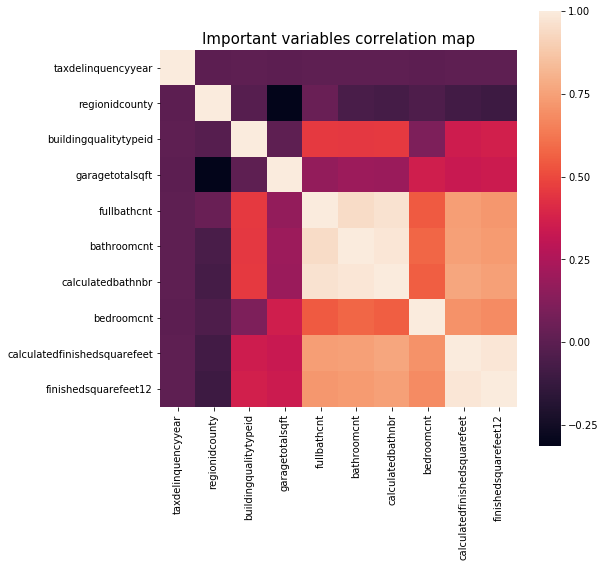

In [15]:
cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

Finished SquareFeet 12:

Let us see how the finished square feet 12 varies with the log error.

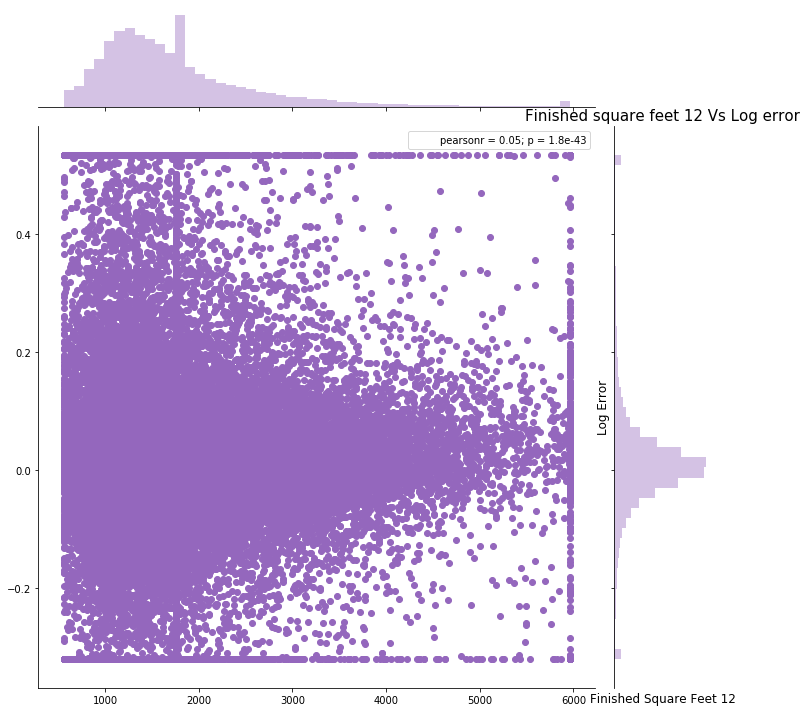

In [16]:
col = "finishedsquarefeet12"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.finishedsquarefeet12.values, y=train_df.logerror.values, size=10, color=color[4])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 Vs Log error", fontsize=15)
plt.show()

Range of logerror narrows down with increase in finished square feet 12 variable.
We can conclude that large house value is easy to predict

#### Calculated finished square feet:

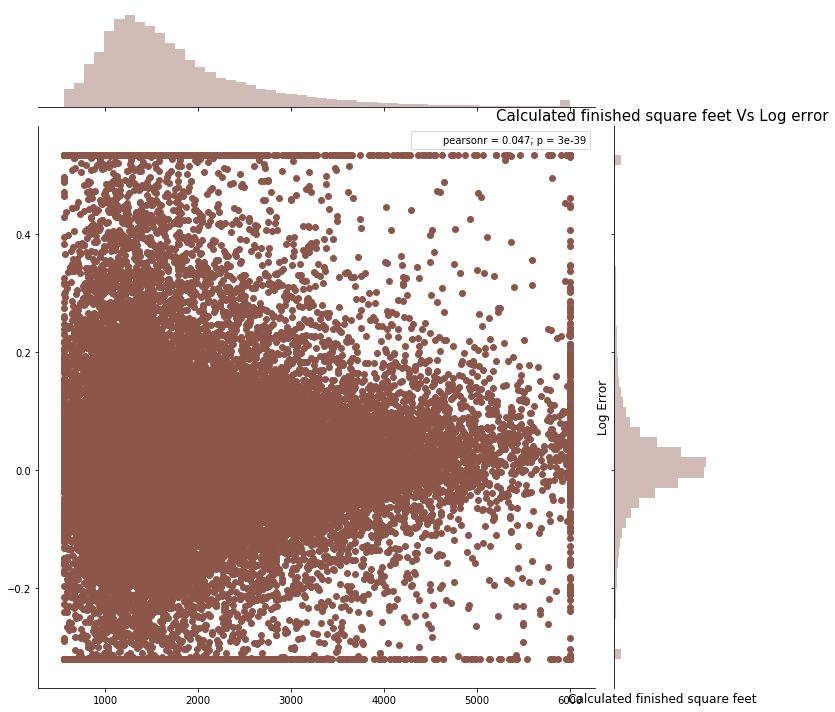

In [17]:
col = "calculatedfinishedsquarefeet"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.calculatedfinishedsquarefeet.values, y=train_df.logerror.values, size=10, color=color[5])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated finished square feet', fontsize=12)
plt.title("Calculated finished square feet Vs Log error", fontsize=15)
plt.show()

Calculated finished square feet and finishedsquarefeet12 are highly related to each other, hence the distribution is similar.

Bathroom Count

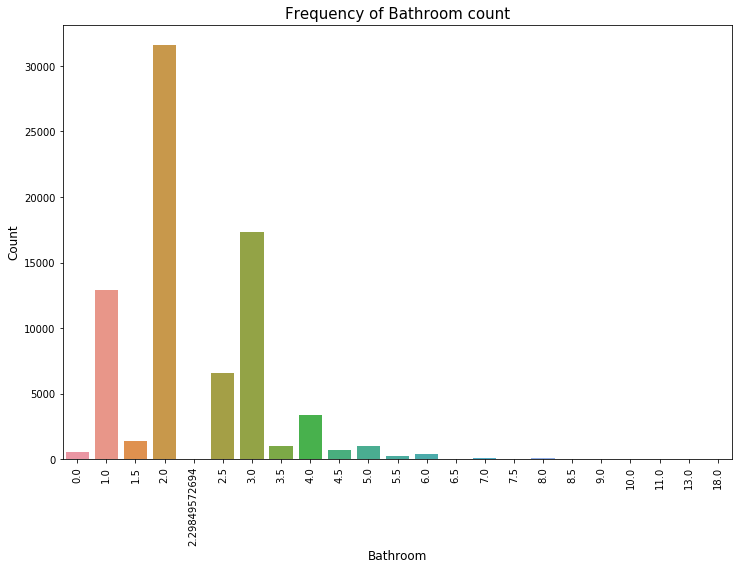

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x="bathroomcnt", data=train_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

There is an interesting 2.279 value in the bathroom count. This is the mean value

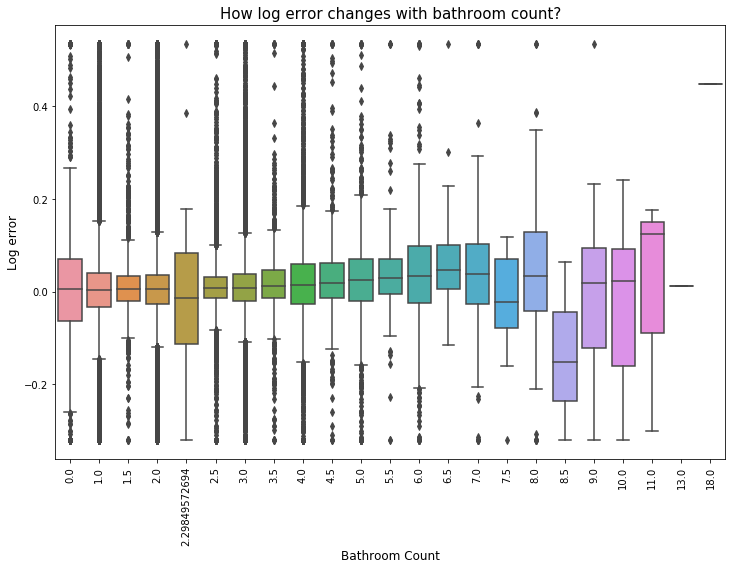

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x="bathroomcnt", y="logerror", data=train_df)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How log error changes with bathroom count?", fontsize=15)
plt.show()

Bedroom count:

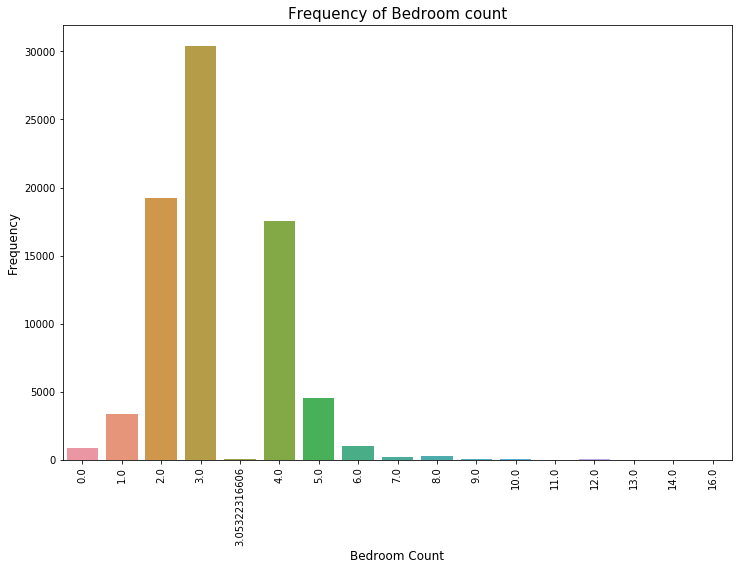

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x="bedroomcnt", data=train_df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

3.03 is the mean value with which we replaced the Null values.

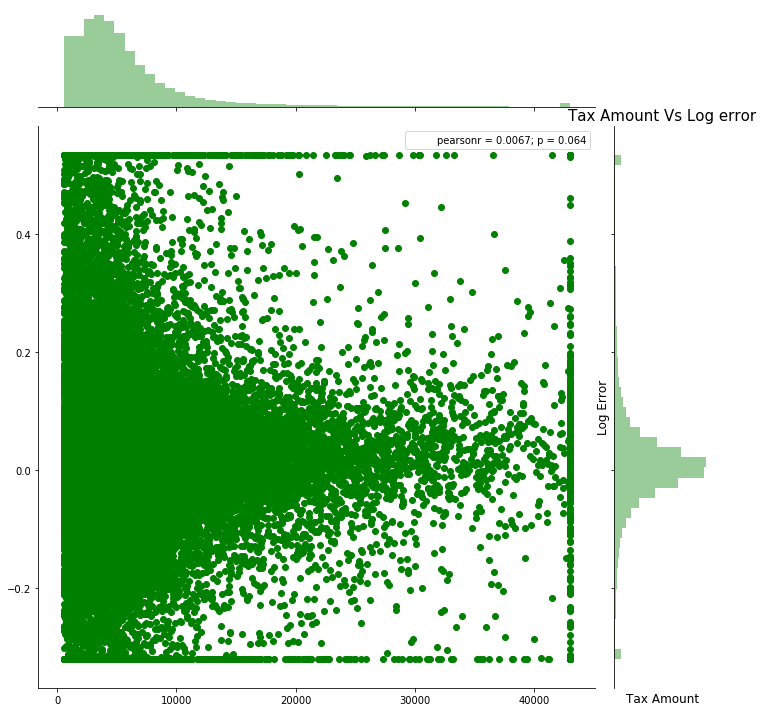

In [21]:
col = "taxamount"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col]>ulimit] = ulimit
train_df[col].loc[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df['taxamount'].values, y=train_df['logerror'].values, size=10, color='g')
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Tax Amount', fontsize=12)
plt.title("Tax Amount Vs Log error", fontsize=15)
plt.show()

YearBuilt:

Let us explore how the error varies with the yearbuilt variable.

In [22]:
# from ggplot import *

In [24]:
#ggplot(aes(x='latitude', y='longitude', color='logerror'), data=train_df) + \
#    geom_point() + \
#    scale_color_gradient(low = 'red', high = 'blue')

There are no visible pockets as such with respect to latitude or longitude atleast with the naked eye.

Let us take the variables with highest positive correlation and highest negative correlation to see if we can see some visible patterns.

# Clustering Analysis

Now lets Cluster our data to bring out the underlying structural similarities within our data.

In [25]:
distance_columns = ['latitude', 'longitude', 'bathroomcnt', 'regionidcounty', 'regionidzip', 'propertylandusetypeid']
total_data = train_df[distance_columns]
total_data = total_data.dropna(how='all')
total_data['regionidzip'] = total_data['regionidzip'].fillna(total_data['regionidzip'].mode()[0])
total_data.head()

,latitude,longitude,bathroomcnt,regionidcounty,regionidzip,propertylandusetypeid
0,33634931.0,-117869207.0,3.5,1286.0,96978.0,261.0
1,34449266.0,-119281531.0,1.0,2061.0,97099.0,261.0
2,33886168.0,-117823170.0,2.0,1286.0,97078.0,261.0
3,34245180.0,-118240722.0,3.0,3101.0,96330.0,261.0
4,34185120.0,-118414640.0,3.0,3101.0,96451.0,266.0


In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(total_data)
kmeans = KMeans(n_clusters=10, random_state=0).fit(reduced_data)
labels = kmeans.predict(reduced_data)
total_data.loc[:, 'label'] = labels
centroids = kmeans.cluster_centers_

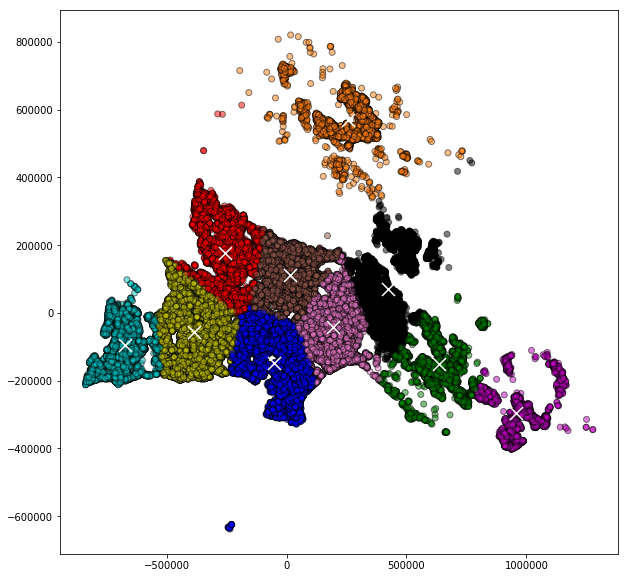

In [27]:
fig = plt.figure(figsize=(10, 10))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'c', 5: 'm', 6: 'y',7:'k',8:'tab:orange',9:'tab:brown',10:'tab:pink'}

# colors = map(lambda x: colmap[x+1], labels)
colors = [colmap[x+1] for x in labels]
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, c='w', marker='x',zorder=10, s=170)
plt.show()

# Regression model development for prediction error
Build training and test data

In [28]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation




C:\Users\Mrunalini\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
#Reading Training Data
dftrain = pd.read_csv('train_2017.csv')
dfprop = pd.read_csv('properties_2017.csv',low_memory = False)



In [31]:
#Filling missing values with -1
dfprop.fillna(-1,inplace=True)



In [32]:
#Merging Datafiles
df = pd.merge(dftrain, dfprop, on='parcelid', suffixes=('', '_r'))

#Dropping meta columns and casting to accepted dtypes
X = df.drop(['parcelid', 'logerror', 'transactiondate',
             'propertyzoningdesc', 'propertycountylandusecode'], axis=1)
for c in ['hashottuborspa', 'fireplaceflag', 'taxdelinquencyflag']:
    X[c] = X[c].astype('bool')
    


In [33]:
#Applying RandomForestRegressor  
clf = RandomForestRegressor()
scores = cross_validation.cross_val_score(clf, X, df.logerror, cv=10, scoring='neg_mean_absolute_error')
print("%s Accuracy: %0.5f" % (clf.__class__.__name__, scores.mean()))
print('--------------------------------------------------')

RandomForestRegressor Accuracy: -0.08619
--------------------------------------------------


In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns
#import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor;

In [35]:
# Set plot parameters
from IPython.display import set_matplotlib_formats

plt.rcParams['savefig.dpi'] = 300

%matplotlib inline
### Seaborn style
sns.set_style("whitegrid")

In [36]:
# Input data files are available in the "../input/" directory, on Kaggle and the GitHub repo for this project.
prop = pd.read_csv("properties_2017.csv", low_memory=False)
prop.shape;

In [37]:
# Now I will calculate the percent missing values(NaN)
nan = prop.isnull().sum()/len(prop)*100

In [38]:
### Plotting NaN counts
nan_sorted = nan.sort_values(ascending=False).to_frame().reset_index()
nan_sorted.columns = ['Column', 'percentNaN']
nan_sorted.head();

In [39]:
train = pd.read_csv("train_2017.csv", parse_dates=["transactiondate"])

In [40]:
train['transaction_month'] = pd.DatetimeIndex(train['transactiondate']).month
train.sort_values('transaction_month', axis=0, ascending=True, inplace=True)

In [41]:
# Here I will merge the train and properties datasets
train = pd.merge(train, prop, on='parcelid', how='left')

In [42]:
# Now I will impute the missing values with median values to compute the importance scores
median_values_train = train.median(axis=0)
train = train.fillna(median_values_train, inplace=True)

In [43]:
for c in train[['transactiondate', 'hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc', 'fireplaceflag', 'taxdelinquencyflag']]:
    label = LabelEncoder()
    label.fit(list(train[c].values))
    train[c] = label.transform(list(train[c].values))

x_train = train.drop(['parcelid', 'logerror', 'transactiondate'], axis=1)
y_train = train['logerror']

In [44]:
rf = RandomForestRegressor(n_estimators=30, max_features=None)
rf.fit(x_train, y_train);

In [45]:
rf_importance = rf.feature_importances_
rf_importance_df = pd.DataFrame()
rf_importance_df['features'] = x_train.columns
rf_importance_df['importance'] = rf_importance
rf_importance_df.head();

In [46]:
rf_importance_df.sort_values('importance', axis=0, inplace=True, ascending=False)

rf_importance_df_trim = rf_importance_df[rf_importance_df.importance>0.001]

rf_importance_df_trim.tail()

rf_feature_list = rf_importance_df_trim.features

In [47]:
fig, ax = plt.subplots(figsize=(48, 100), dpi=300)
sns.set_context("poster", font_scale=6)
# [1]
sns.barplot(x="importance", y="features", data=rf_importance_df, color='Green', ax=ax)
ax.set(xlabel="Importance (Variance explained)", ylabel="")
ax.set_title('Random Forest Importance', fontsize= 96)
plt.show()